In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

In [62]:
import pathlib
data_dir='Dataset'
data=pathlib.Path(data_dir)

In [63]:
image_count = len(list(data.glob('*/*.jpg')))
print(image_count)

198


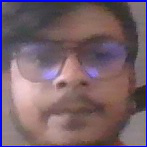

In [64]:
rishav = list(data.glob('rishav/*'))
PIL.Image.open(str(rishav[0]))

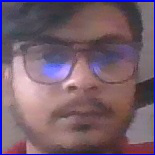

In [65]:
PIL.Image.open(str(rishav[34]))

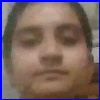

In [66]:
simran = list(data.glob('simran/*'))
PIL.Image.open(str(simran[0]))

In [67]:
class_name=['rishav','simran']

In [68]:
import cv2

In [69]:
dataset=[]
for i in rishav:
    img_data = cv2.imread(str(i))
    img1 = cv2.resize(img_data,(50,50))
    dataset.append([np.array(img1),0])
for i in simran:
    img_data = cv2.imread(str(i))
    img1 = cv2.resize(img_data,(50,50))
    dataset.append([np.array(img1),1])

In [70]:
from random import shuffle
shuffle(dataset)

In [71]:
len(dataset)

198

In [72]:
train=dataset[:170]
test=dataset[170:]

In [73]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch)
  break

(50, 50, 3)
1


In [74]:
X_train = np.array([i[0] for i in train])
y_train = np.array([i[1] for i in train])

In [75]:
print(X_train.shape)

(170, 50, 50, 3)


In [76]:
X_test = np.array([i[0] for i in test])
print(X_test.shape)
y_test = np.array([i[1] for i in test])

(28, 50, 50, 3)


In [77]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [78]:
model=Sequential([
  #,input_shape=(50,50,3)
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(50,50,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [81]:

model.fit(X_train, y_train, epochs=12)

Epoch 1/12
6/6 [==============================] - 1s 66ms/step - loss: 0.6646 - accuracy: 0.5882
Epoch 2/12
6/6 [==============================] - 0s 61ms/step - loss: 0.5768 - accuracy: 0.7118
Epoch 3/12
6/6 [==============================] - 0s 56ms/step - loss: 0.3210 - accuracy: 0.9824
Epoch 4/12
6/6 [==============================] - 0s 56ms/step - loss: 0.1404 - accuracy: 0.9647
Epoch 5/12
6/6 [==============================] - 0s 58ms/step - loss: 0.0956 - accuracy: 0.9647
Epoch 6/12
6/6 [==============================] - 0s 54ms/step - loss: 0.0311 - accuracy: 0.9941
Epoch 7/12
6/6 [==============================] - 0s 58ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 8/12
6/6 [==============================] - 0s 58ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/12
6/6 [==============================] - 0s 63ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/12
6/6 [==============================] - 0s 54ms/step - loss: 7.0713e-04 - accuracy: 1.0000
Epoch 11/12
6/6 [========

In [82]:
predictions = model.predict(X_test)
score = tf.nn.softmax(predictions[10])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to simran with a 99.99 percent confidence.


In [83]:
len(X_test)

28

In [84]:
score=(tf.nn.softmax(predictions))

In [85]:
y_classes=[np.argmax(i)for i in score]
y_classes

[1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1]

In [86]:
def plot_sample(X, y, index):
    plt.figure(figsize = (20,4))
    plt.imshow(X[index])
    plt.xlabel(class_name[y[index]])

<ipython-input-86-e450b1202c76>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (20,4))


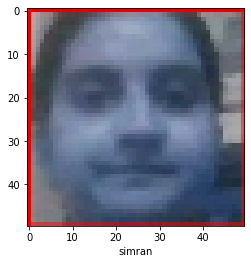

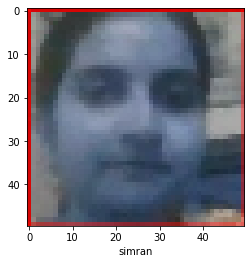

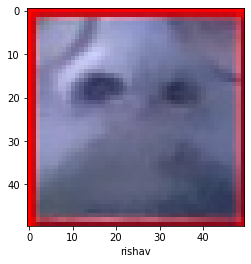

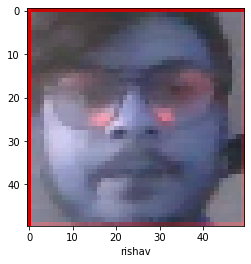

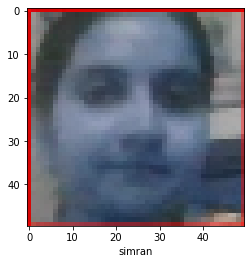

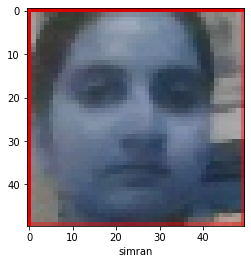

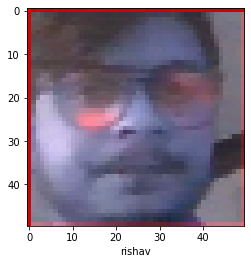

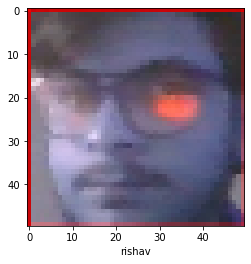

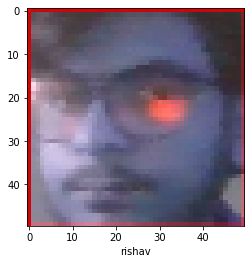

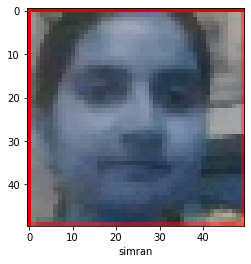

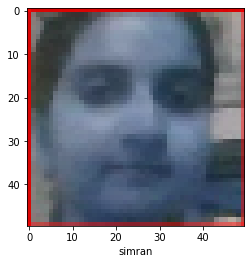

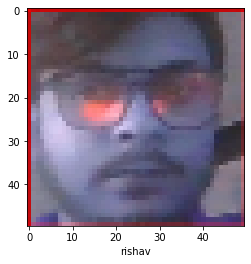

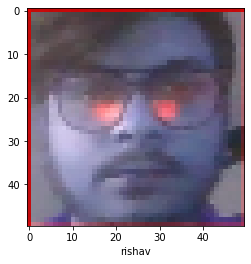

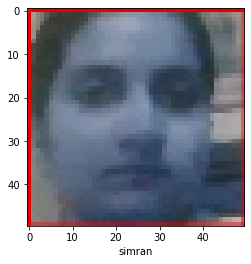

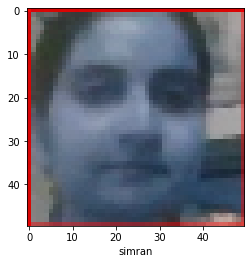

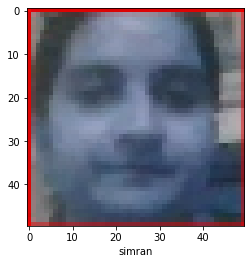

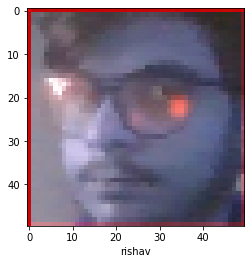

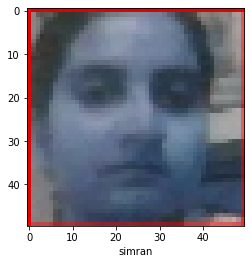

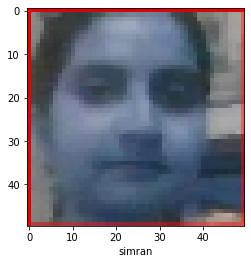

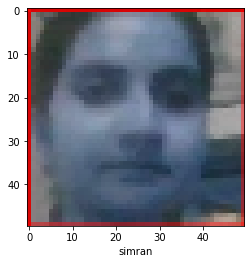

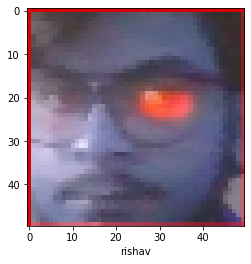

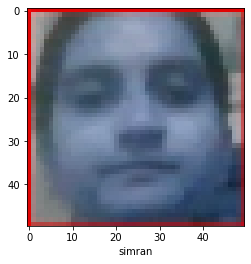

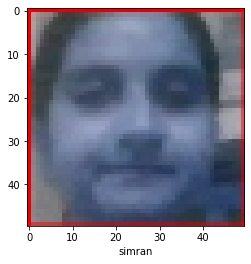

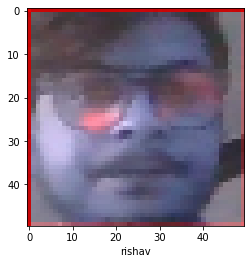

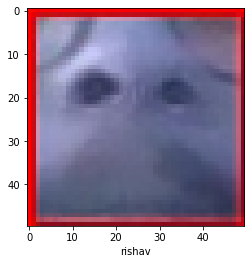

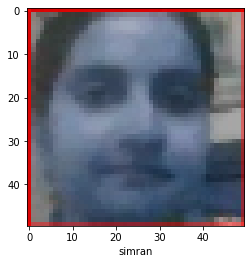

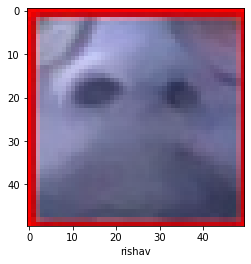

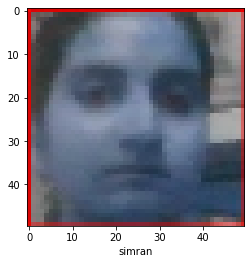

In [87]:
for i in range(len(X_test)):
    plot_sample(X_test,y_classes,i)

In [88]:
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

In [109]:
cam = cv2.VideoCapture(0)
cam.set(4, 4800) # set video widht
cam.set(4, 480) # set video height
count=1
while True:
    ret, img =cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (50,50),
       )
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        count+=1
        test=img[y:y+h,x:x+w]
        cv2.imwrite('test.jpg',test)
        
        
    cv2.imshow('camera',img) 
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break
    elif count>=2:
        break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()
        
        
        


 [INFO] Exiting Program and cleanup stuff


In [110]:
test_img=cv2.imread('test.jpg')
print(test_img)

[[[  0 255   3]
  [  0 254   0]
  [  1 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 254   0]]

 [[  0 254   3]
  [  8 249  10]
  [ 28 236  28]
  ...
  [ 28 229  42]
  [ 15 234  30]
  [  9 254  12]]

 [[  2 255   2]
  [ 26 236  28]
  [  0  96   0]
  ...
  [ 31 112  73]
  [ 12 140  45]
  [ 18 230  23]]

 ...

 [[  0 255   0]
  [ 31 231  36]
  [ 37 111  47]
  ...
  [ 33  44  36]
  [  0  67   0]
  [ 37 228  39]]

 [[  0 255   0]
  [ 17 236  25]
  [  0 114   3]
  ...
  [  0  69   0]
  [  0  83   0]
  [ 29 239  32]]

 [[  0 255   0]
  [  6 251   9]
  [ 24 233  29]
  ...
  [ 35 228  34]
  [ 29 239  31]
  [  2 247   7]]]


In [111]:
img1 = cv2.resize(test_img,(50,50))
img1.shape

(50, 50, 3)

In [112]:
test1=[]
test1.append(np.array(img1))
x_test=np.array([i for i in test1])
x_test.shape

(1, 50, 50, 3)

This image most likely belongs to rishav with a 55.64 percent confidence.


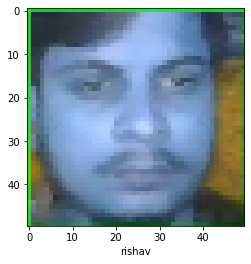

In [113]:
prediction= model.predict(x_test)
score = tf.nn.softmax(prediction)
confidence=np.max(score)*100
name=class_name[np.argmax(score)]
if confidence<0:
    name='Unknown'
plt.figure(figsize = (20,4))
plt.imshow(x_test[0])
plt.xlabel(name)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)